# Introduction to Python

Python is an object-oriented high-level programming language widely used by astronomers and scientists of all stripes in the current day and age. It is a very flexible language, and can be used for everything from data analysis to MCMC simulations to automated instrumentation control and more. With its robust community support, new packages and functionality are being added to the broader Python lexicon every day, making it a very exciting and accessible language to learn.

Let's start with some background: what does high-level mean in this context? And how can a programming language be "object-oriented"?

### High-Level vs. Low-Level Programming

In computing, high-level generally means that it's abstracted from the actual computational machinations it's asking for. That is to say: high-level generally means easier for humans to read, but harder for computers to read. Low-level languages, such as machine code and assembly language, interact with the processors and hardware directly. This makes them rigid and non-portable in general, but also very fast and memory-efficient. Low-level languages are often referred to as being "close to the hardware".

On the other side, high level languages are separated from the processors and hardware, with things like memory management generally being hidden from direct view. As opposed to working directly with software registers and memory buses, high level languages work with variables, arrays, and objects. They also tend to make use of more natural language elements, which can make them easier for a beginner to read and understand.

### Object-Oriented Languages

Object-oriented languages are languages which emphasize the use of objects, which may contain data in form of attributes or fields, in conjunction with code in the form of procedures, functions, and methods. In encouraging the development of new classes of objects, Python enables the user to customize the flow and handling of information.

There are two main ways to use Python: as a script or interactively. Let's review both cases and when you might choose one over the other.

## Scripting Python

A script is a list of commands that is run in order from start to finish, which then produces some output (such data saved to a file or displaying a plot or figure). Using Python in this fashion generally means opening a file and saving all your code to disk. This is helpful when it comes to the development of tools and methods that you're likely to use repeatedly or intend to reference in the future. 

To use Python in this fashion, you would generally start by creating a program in a file ending with the suffix .py, which you could run by using the command:

    python FILENAME.py


## Interactive Python (i.e. iPython)

iPython is an interactive command-line terminal environment for Python, which runs commands individually as they are given and displays results instantly. This enables quick access to the functionality of Python, making it particularly valuable for quick debugging and data visualization. The commands run in iPython are not saved to disk.

To use iPython, simply run the following command in your terminal:

    ipython

# Plotting in Python

It can be a little discouraging to look at someone's Python code and see dozens of lines of code dedicated to generating a plot. While there are plenty of tools at your disposal to generate the perfect plot for your needs, fundamentally you only need two things: some kind of plot function combined with a display function. Let's start with something basic.

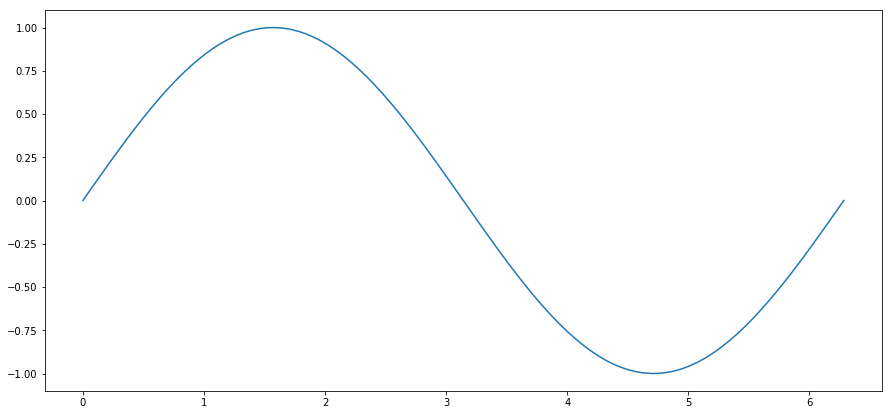

In [129]:
import matplotlib.pylab as pl
import numpy as np

pl.rcParams['figure.figsize'] = (15.0, 7.0)

x = np.linspace(0,2*np.pi, 100)
data = np.sin(x)

pl.plot(x,data)

Jupyter notebooks are a little bit different than typical Python scripts in that no display function is needed. If you're writing a script or working in iPython on your computer, you'll also have to run the following command to see your plot:

    pl.show()
    
## Overplotting Multiple Data Sets in One Plot

What else can we do? Let's try overplotting another stream of data on top of the original. This is done by simply calling the pl.plot() function multiple times before displaying.

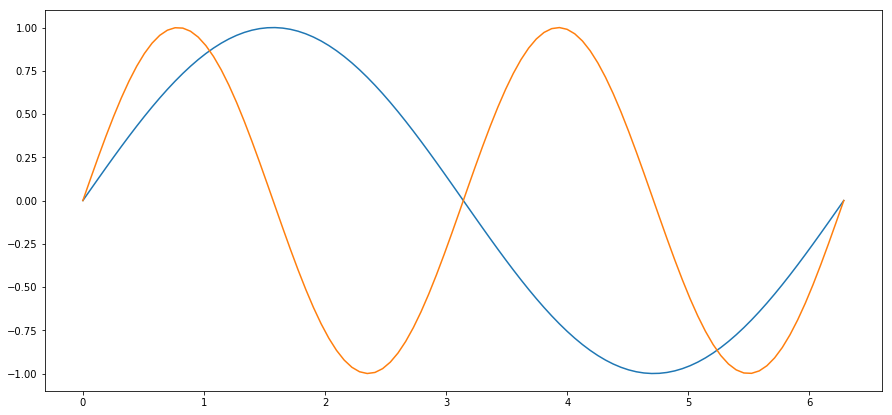

In [130]:
data2 = np.sin(2*x)

pl.plot(x,data)
pl.plot(x,data2)

## Subplots

It's also fairly common to want to show two or more related plots simultaneously. For example, radio astronomers often want to know about the amplitude and phase of a data set. This makes it convenient to be able to group plots together, which is where subplotting comes in.

Let's take a look at how this works. For this example, we're going to take a short impulse in the time domain and Fourier transform it to look at its amplitude and phase characteristics in the frequency domain.

Ok.


[-5.0, 4.9500000000000002, -3.2, 3.2]

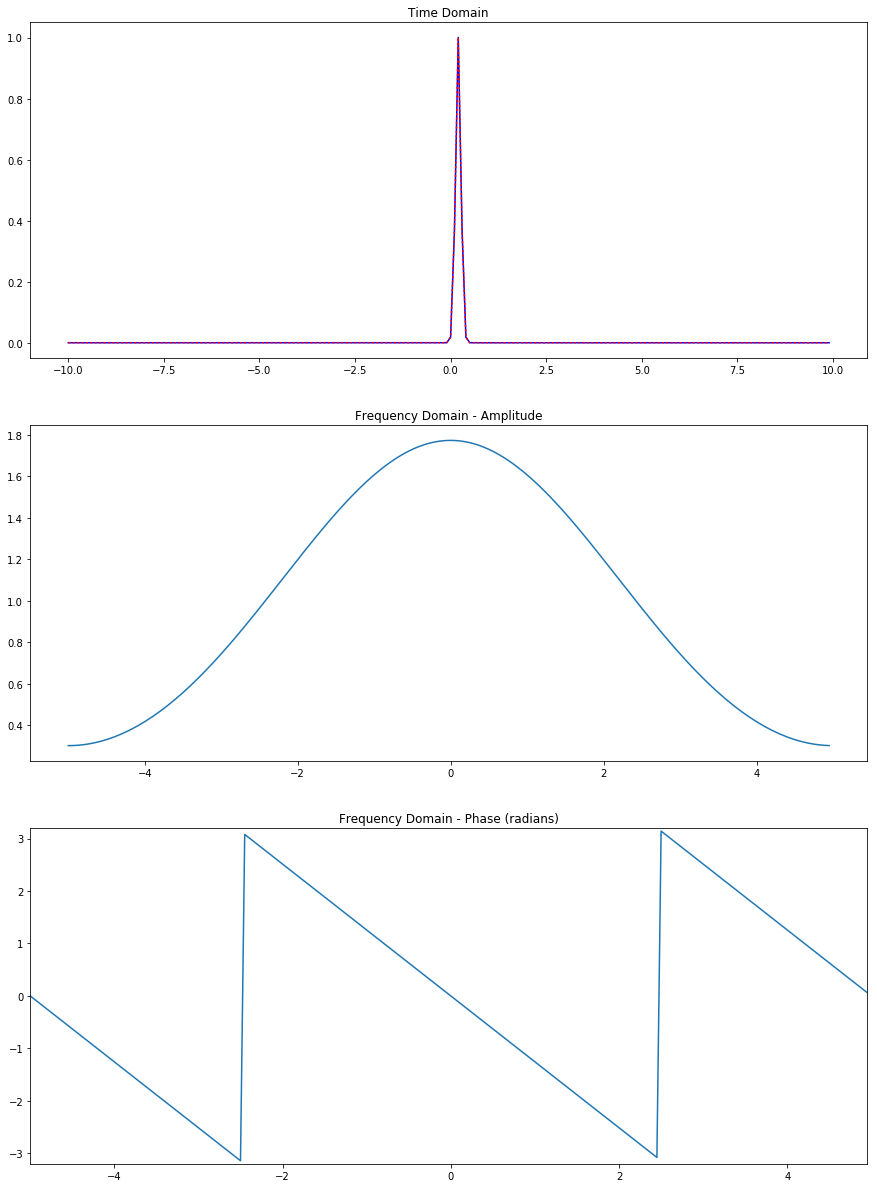

In [49]:
t_bin = 0.1 # seconds
t_int = 20.0 # seconds

time = np.arange(-t_int/2.,t_int/2.,t_bin)
freqs = np.fft.fftshift(np.fft.fftfreq(len(time),t_bin))

# impulse width
s = 0.1

### source delay (in seconds)
### move this around 0.0, 0.1, 0.2, etc and see what happens to the phase
tau = 0.2

# data
data = np.exp ( -1 * (time-tau)**2 / (s*s) )

# FT of data
fdata = np.fft.fftshift( np.fft.fft( np.fft.ifftshift( data ) ) )

# Inverse FT
# Should be identical to data
ifdata = np.fft.fftshift( np.fft.ifft( np.fft.ifftshift( fdata ) ) )
if np.all(np.abs(ifdata-data) < 1.e-8) == True:
    print "Ok."
else:
    print "Oh no."

# Plot everything...

fig = pl.figure(figsize=(15.,21.)) # instantiate figure object and set its size

ax1 = fig.add_subplot(311) # these numbers indicate, in order, number of rows, number of columns, and the position of this figure
ax1.set(title="Time Domain")
ax1.plot(time,data,'b-')
ax1.plot(time,ifdata.real,'r:')

ax2 = fig.add_subplot(312)
ax2.set(title="Frequency Domain - Amplitude")
ax2.plot(freqs, np.abs(fdata) )

ax3 = fig.add_subplot(313)
ax3.set(title="Frequency Domain - Phase (radians)")
ax3.plot(freqs, np.arctan2( fdata.imag, fdata.real ) )
ax3.axis( [ np.min(freqs), np.max(freqs), -3.2, 3.2] )

## How to Properly Label Plots

Plots and figures exist to help people better understand information. By visualizing a data set, you can help people to better understand what your data means. An important aspect of this is proper labeling -- if people don't know what values and measurements they're looking at, how will they be able to understand what it's actually telling them?

So let's learn a little bit about best practices in labelling plots in Python.

## Titles

Use them. There's a couple of commands here that can be useful. For a typical figure, you can run the following command:

    pl.title('This is the title of my plot.')
    
However, in more specialized cases, such as the above set of subplots, you might need to be a little more clever. As shown above, you can assign your subplots to a variable and then give each subplot a title using the following set of commands:

    fig = pl.figure()
    ax = fig.subplot(111) 
    ax.set(title='This is the title of my plot.')

If you want to give a main title to a set of subplots, you can use the following command:
    
    fig.suptitle('This is the main title of this set of plots.')

## Axis Labels

Arguably even more important than figure titles are axis labels. The formatting and labeling of your axes pretty much unilaterally determine your plot's readability. So how can you make sure your axis labels are helping and not hindering your science communication?

### Make sure to have physical units on your axes.

Rather than leaving your plots in terms of just bin number or array index, take a moment to ensure that all of your axes are labeled with real units. To do this, you'll likely want to make use of the xlabel and ylabel commands.

    pl.xlabel('This is the label of my x-axis.')
    pl.ylabel('This is the label of my y-axis.')

## Legends

Legends are very helpful as a tool to guide your reader through plots presenting multiple data sets. To create a legend in Python, use the following command at the end of your plotting function calls, just before displaying:

    pl.legend()
    
Note: In order for the legend to be populated with helpful information, you must run your plot commands with the label option. This will look like this:

    pl.plot(function, label='This is the label for this data set.')
    pl.legend()
    pl.show()

Let's check out an example of all of this labeling guidance. For this demonstration, we'll take two time-streams of noisy data and correlate them to show how the uncorrelated noise between signals diminishes when they are combined. We'll make a point to give our axes physical meaning and helpful labels, we'll create a legend to help readers distinguish the two data streams we're presenting, and we'll give the whole thing a title that encapsulates our main takeaway point.

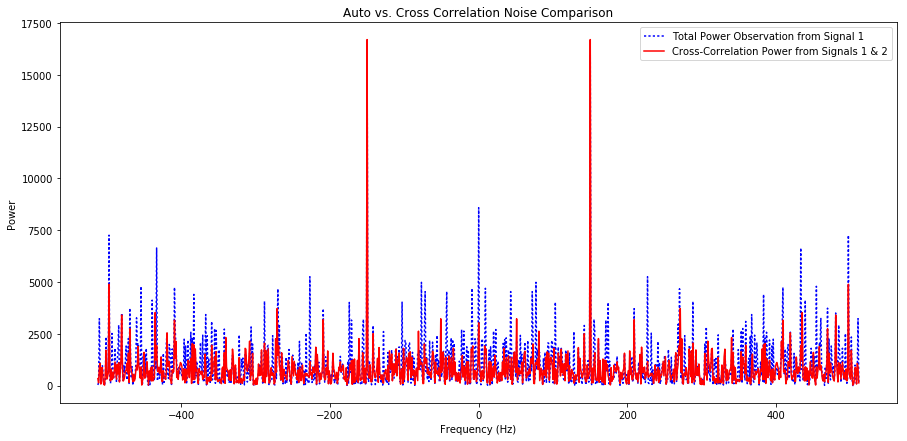

In [131]:
N = 1024 # number of samples in time-domain spectrum
times = np.linspace(0,1.,N) # 1 second capture
freqs = np.fft.fftshift(np.fft.fftfreq(N,1./N))
true_signal = np.sin(2*np.pi*(150*times)) # 150 Hz signal
obs_signal1 = 0.25*true_signal + np.random.randn(N)
obs_signal2 = 0.25*true_signal + np.random.randn(N)

fx_cross_signal = np.fft.fftshift(np.fft.fft(obs_signal1)) * np.fft.fftshift(np.fft.fft(obs_signal2))
fx_tp_signal = np.fft.fftshift(np.fft.fft(obs_signal1)) * np.fft.fftshift(np.fft.fft(obs_signal1))

pl.plot(freqs,np.abs(fx_tp_signal),'b:', label='Total Power Observation from Signal 1')
pl.plot(freqs,np.abs(fx_cross_signal), 'r-', label='Cross-Correlation Power from Signals 1 & 2')
pl.xlabel('Frequency (Hz)')
pl.ylabel('Power')
pl.title('Auto vs. Cross Correlation Noise Comparison')
pl.legend()

# Saving Figures

Python makes it very easy to save your plots to many different file formats, depending on your needs. The two most common formats you'll likely want to use are PDFs and PNGs.

## Exporting to PNGs

This is the easiest type of figure to save in Python, since it's a built-in feature of matplotlib. To save the file into your current working directory, all that you have to do is specify a filename and call the following function:

    pl.savefig('filename.png')
    
If you want to save the file to an arbitrary location on your computer, you can include a path name with your filename like so:

    pl.savefig('/path/to/filename.png')
    
The downside of using the PNG file format is that your images are saved to pixels, making them resolution limited. This means that any reshaping you may want to do after the generation of the file is liable to create distortions and pixelation. This typically means that you will have to remake your figure each time you'd like to use it in a new way (e.g. in a presentation vs. in a paper). It's not uncommon for scientists to specialize their plots like this, but it can be a hassle.
    
## Exporting to PDFs

On the other hand, PDFs are based on vector mapping, making them non-resolution-limited. This is an attractive feature, but they can be a bit more challenging to import into LaTeX files.

To generate a PDF figure in Python, run the following command:

    pl.savefig('filename.pdf', format='pdf')
    
## Other File Formats

The matplotlib savefig() command can support many file formats, including PNG, PDF, PS, EPS and SVG. There are pros and cons to each of these, and they will often require handling from different LaTeX packages when writing up your final reports. You are welcome to explore and choose whichever you like best!

--> color & aesthetics
    --> plot points vs. lines for discrete vs. continuous signal (avoid overcrowding, etc)
    --> emphasize the lines/points you want to by manipulating line width and style
    --> don't use colors if you don't have to (can only hurt you!)
    --> scaling the axis labels and tick sizes to be readable